In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set the model training need 10000kWh power
energy_consump_model = 10000

### Hourly Data

In [3]:
# read the PVWattsHourly.csv file
df_hourly = pd.read_csv('PVWattsHourly.csv')
df_hourly

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
0,1,1,0,0,0,-1.4,0.0,0.2,0.0,-1.4,0.0,0.0
1,1,1,1,0,0,-1.8,0.0,0.2,0.0,-1.8,0.0,0.0
2,1,1,2,0,0,-2.4,0.0,0.2,0.0,-2.4,0.0,0.0
3,1,1,3,0,0,-3.2,0.0,0.2,0.0,-3.2,0.0,0.0
4,1,1,4,0,0,-3.5,0.0,0.2,0.0,-3.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,19,0,0,1.5,0.0,0.2,0.0,1.5,0.0,0.0
8756,12,31,20,0,0,1.3,0.0,0.2,0.0,1.3,0.0,0.0
8757,12,31,21,0,0,1.2,0.0,0.2,0.0,1.2,0.0,0.0
8758,12,31,22,0,0,0.9,0.0,0.2,0.0,0.9,0.0,0.0


In [4]:
# save the Month, Day, Hour, and AC System Output columns to a new dataframe
df_hourly_new = df_hourly[['Month', 'Day', 'Hour', 'AC System Output (W)']]
df_hourly_new

,Month,Day,Hour,AC System Output (W)
0,1,1,0,0.0
1,1,1,1,0.0
2,1,1,2,0.0
3,1,1,3,0.0
4,1,1,4,0.0
...,...,...,...,...
8755,12,31,19,0.0
8756,12,31,20,0.0
8757,12,31,21,0.0
8758,12,31,22,0.0


In [5]:
# consider that the AC System Output is in W, so we need to convert it to kWh
df_hourly_new['AC System Output (kWh)'] = df_hourly_new['AC System Output (W)'] / 1000
df_hourly_new[:20]

/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_37138/298856320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly_new['AC System Output (kWh)'] = df_hourly_new['AC System Output (W)'] / 1000


,Month,Day,Hour,AC System Output (W),AC System Output (kWh)
0,1,1,0,0.000,0.000000
1,1,1,1,0.000,0.000000
2,1,1,2,0.000,0.000000
3,1,1,3,0.000,0.000000
4,1,1,4,0.000,0.000000
5,1,1,5,0.000,0.000000
6,1,1,6,0.000,0.000000
7,1,1,7,0.000,0.000000
8,1,1,8,0.000,0.000000
9,1,1,9,2547.074,2.547074


In [6]:
# add a new column, the value in the column is the value that the model training left to reach 10000kWh
print(len(df_hourly_new))
# df_hourly_new['Energy Left (kWh)'] = energy_consump_model - df_hourly_new['AC System Output (kWh)']
# add a new column, the value in the column is the value that the model training left to reach 10000kWh
df_hourly_new['Energy Left (kWh)'] = 0
# df_hourly_new[:20]
for i in range(len(df_hourly_new)):
    energy_consump_model = energy_consump_model - df_hourly_new['AC System Output (kWh)'][i]
    df_hourly_new['Energy Left (kWh)'][i] = energy_consump_model
    if energy_consump_model < 0:
        df_hourly_new['Energy Left (kWh)'][i] = 0
df_hourly_new[:20]
    

/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_37138/3319695622.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly_new['Energy Left (kWh)'] = 0
/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_37138/3319695622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly_new['Energy Left (kWh)'][i] = energy_consump_model
/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_37138/3319695622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

8760


,Month,Day,Hour,AC System Output (W),AC System Output (kWh),Energy Left (kWh)
0,1,1,0,0.000,0.000000,10000.000000
1,1,1,1,0.000,0.000000,10000.000000
2,1,1,2,0.000,0.000000,10000.000000
3,1,1,3,0.000,0.000000,10000.000000
4,1,1,4,0.000,0.000000,10000.000000
5,1,1,5,0.000,0.000000,10000.000000
6,1,1,6,0.000,0.000000,10000.000000
7,1,1,7,0.000,0.000000,10000.000000
8,1,1,8,0.000,0.000000,10000.000000
9,1,1,9,2547.074,2.547074,9997.452926


In [7]:
# find out the first column in the Energy Left (kWh) column that is 0, and output the corresponding Month, Day, and Hour
df_hourly_new[df_hourly_new['Energy Left (kWh)'] == 0].head(1)

,Month,Day,Hour,AC System Output (W),AC System Output (kWh),Energy Left (kWh)
4788,7,19,12,9484.526,9.484526,0.0


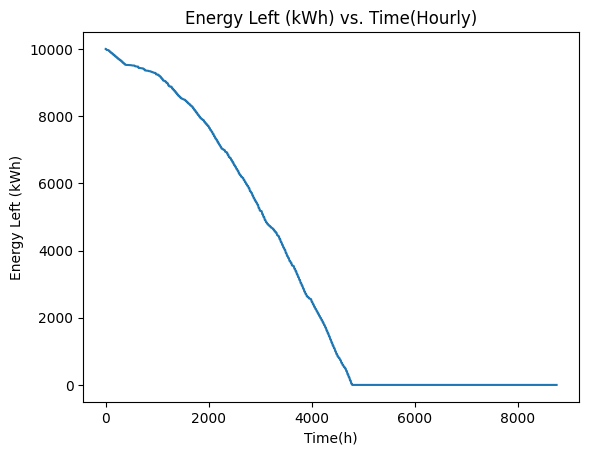

In [8]:
# plot the Energy Left (kWh) column, the x-axis is the time using the Month, Day, and Hour columns, and the y-axis is the Energy Left (kWh) column
plt.plot(df_hourly_new['Energy Left (kWh)'])
plt.xlabel('Time(h)')
plt.ylabel('Energy Left (kWh)')
plt.title('Energy Left (kWh) vs. Time(Hourly)')
plt.show()

### Monthly Data

In [9]:
# read the PVWattsMonthly.csv file
df_monthly = pd.read_csv('PVWattsMonthly.csv')
df_monthly

,Month,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh)
0,1,1.635,640.538,603.295
1,2,2.413,831.819,786.765
2,3,3.738,1398.071,1328.413
3,4,5.096,1807.247,1721.273
4,5,5.880,2104.112,2004.209
5,6,6.530,2214.730,2110.796
6,7,6.841,2363.227,2253.957
7,8,5.891,2036.534,1940.487
8,9,4.341,1499.493,1426.085
9,10,2.676,980.973,927.727


In [10]:
# save the Month and AC System Output columns to a new dataframe
df_monthly_new = df_monthly[['Month', 'AC System Output (kWh)']]
df_monthly_new

,Month,AC System Output (kWh)
0,1,603.295
1,2,786.765
2,3,1328.413
3,4,1721.273
4,5,2004.209
5,6,2110.796
6,7,2253.957
7,8,1940.487
8,9,1426.085
9,10,927.727


In [11]:
energy_consump_model = 10000

In [12]:
# add a new column, the value in the column is the value that the model training left to reach 10000kWh
print(len(df_monthly_new))
# df_hourly_new['Energy Left (kWh)'] = energy_consump_model - df_hourly_new['AC System Output (kWh)']
# add a new column, the value in the column is the value that the model training left to reach 10000kWh
df_monthly_new['Energy Left (kWh)'] = 0
# df_hourly_new[:20]
for i in range(len(df_monthly_new)):
    energy_consump_model = energy_consump_model - df_monthly_new['AC System Output (kWh)'][i]
    df_monthly_new['Energy Left (kWh)'][i] = energy_consump_model
    if energy_consump_model < 0:
        df_monthly_new['Energy Left (kWh)'][i] = 0
df_monthly_new

12


/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_37138/1447242297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_new['Energy Left (kWh)'] = 0
/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_37138/1447242297.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_new['Energy Left (kWh)'][i] = energy_consump_model
/var/folders/z9/ym3y50cd7q7gfczkkgdfrbp00000gn/T/ipykernel_37138/1447242297.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

,Month,AC System Output (kWh),Energy Left (kWh)
0,1,603.295,9396.705
1,2,786.765,8609.940
2,3,1328.413,7281.527
3,4,1721.273,5560.254
4,5,2004.209,3556.045
5,6,2110.796,1445.249
6,7,2253.957,0.000
7,8,1940.487,0.000
8,9,1426.085,0.000
9,10,927.727,0.000


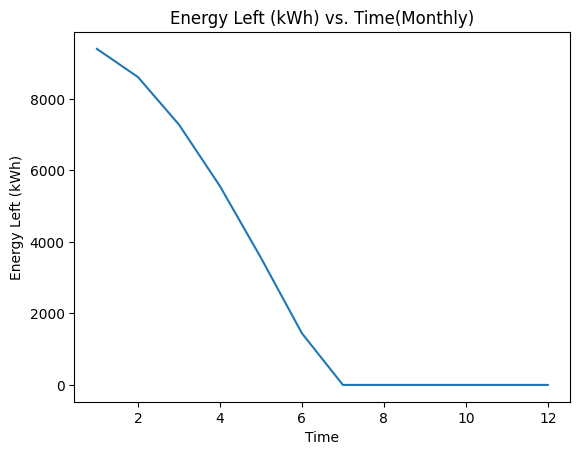

In [13]:
# plot the Energy Left (kWh) column, the x-axis is the time using the Month column, and the y-axis is the Energy Left (kWh) column
plt.plot(df_monthly_new['Month'], df_monthly_new['Energy Left (kWh)'])
plt.xlabel('Time')
plt.ylabel('Energy Left (kWh)')
plt.title('Energy Left (kWh) vs. Time(Monthly)')
plt.show()